<h2>Data Science for Business</h2>
<h3>Laboratory Work #1</h3>
<hr>
<p>Group laboratory work on the subject "Data Science for Business".</p>
<p>Two datasets were used to perform the laboratory work :</p>
<ul>
    <li><a href="input/russian_demography.csv">Russia demography</a></li>
    <li><a href="input/russia_alcohol.csv">Russia alcohol</a></li>
</ul>

## Import

In [1]:
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', rc={'figure.figsize': (15, 10)})

## Acquire data

In [2]:
# Acquire data

data_dm = pd.read_csv("input/russian_demography.csv")
data_al = pd.read_csv("input/russia_alcohol.csv")

## Merge and organize informations

In [3]:
# Preparing the dataset

# Merging data
data_merged = pd.merge(data_al, data_dm, how='left', on=['year', 'region'])

# Removing eventual duplicates
alcohol_demography = data_merged.drop_duplicates(subset=['year','region'])
if len(data_merged) != len(alcohol_demography):
    print('Found duplicates')
else:
    print('No duplicates found')

# Verify that the dataset contains all the years
year_max = alcohol_demography['year'].loc[alcohol_demography['year'].idxmax()]
year_min = alcohol_demography['year'].loc[alcohol_demography['year'].idxmin()]
total_years = len(alcohol_demography.drop_duplicates(subset=['year']))
if total_years != (year_max - year_min + 1):
    print('There are missing years between {} and {}.'.format(year_min, year_max))
else:
    print('All years exit in the dataset between {} and {}.'.format(year_min, year_max))

# Inserting new column: pac - pure_alcohol_consumption 
new_column = round(alcohol_demography['wine'] * 0.12 
             + alcohol_demography['beer'] * 0.06
             + alcohol_demography['vodka'] * 0.4 
             + alcohol_demography['champagne'] * 0.11 
             + alcohol_demography['brandy'] * 0.4, 2)
# we then add the series to the dataframe, which holds our parsed CSV file
alcohol_demography['pac'] = new_column
# Change datatype of column YEAR to allow printing the x_axis properly
alcohol_demography["year"] = pd.to_datetime(alcohol_demography["year"].astype(str), format="%Y")
# Show the dataset
pd.set_option('display.max_rows', alcohol_demography.shape[0]+1)
alcohol_demography.head()

No duplicates found
All years exit in the dataset between 1998 and 2016.


,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization,pac
0,1998-01-01,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,-4.3,9.6,13.9,83.33,53.05,2.19
1,1998-01-01,Altai Krai,3.3,19.2,11.3,1.1,0.1,-4.0,8.8,12.8,72.67,52.76,6.23
2,1998-01-01,Amur Oblast,2.1,21.2,17.3,0.7,0.4,-1.8,10.4,12.2,65.59,66.07,8.68
3,1998-01-01,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,-4.2,9.1,13.3,68.28,74.30,6.00
4,1998-01-01,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,-3.7,9.6,13.3,73.76,68.13,5.40


<h4>Description of the dataset</h4>
<ul>
<li>year - year (1998-2016)</li>
<li>region - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single</li>
<li>wine - sale of wine in litres by year per capita</li>
<li>beer - sale of beer in litres by year per capita</li>
<li>vodka - sale of vodka in litres by year per capita</li>
<li>champagne - sale of champagne in litres by year per capita</li>
<li>brandy - sale of brandy in litres by year per capita</li>
<li>npg - natural population growth by 1000 people</li>
<li>birth_rate - number of births by 1000 people</li>
<li>death_rate - number of deaths by 1000 people</li>
<li>gdw - general demographic weight (how many people of non-woking age account for 100 people of working age)</li>
<li>urbanization - % of urban population</li>
<li>pac - pure alcohol consumption </li>
</ul>

In [4]:
# Infer data fill gaps in order to maximize the dataset
alcohol_demography['npg'] = np.where(np.isnan(alcohol_demography['npg']) & 
                                     ~np.isnan(alcohol_demography['birth_rate']) &
                                     ~np.isnan(alcohol_demography['death_rate']),
                                     alcohol_demography['birth_rate'] - alcohol_demography['death_rate'],
                                    alcohol_demography['npg'])
alcohol_demography['birth_rate'] = np.where(np.isnan(alcohol_demography['birth_rate']) & 
                                     ~np.isnan(alcohol_demography['npg']) &
                                     ~np.isnan(alcohol_demography['death_rate']),
                                     np.abs(alcohol_demography['npg'] + alcohol_demography['death_rate']),
                                    alcohol_demography['birth_rate'])
alcohol_demography['death_rate'] = np.where(np.isnan(alcohol_demography['death_rate']) & 
                                     ~np.isnan(alcohol_demography['npg']) &
                                     ~np.isnan(alcohol_demography['birth_rate']),
                                     np.abs(alcohol_demography['birth_rate'] - alcohol_demography['npg']),
                                    alcohol_demography['death_rate'])


## Data analysis

<h2>Relation between birth and death rates and pure alcohol consumption</h2>

[Text(0.5, 1.0, 'Relation between birth and death rates and pure alcohol consumption from 1998 to 2016 in Russia')]

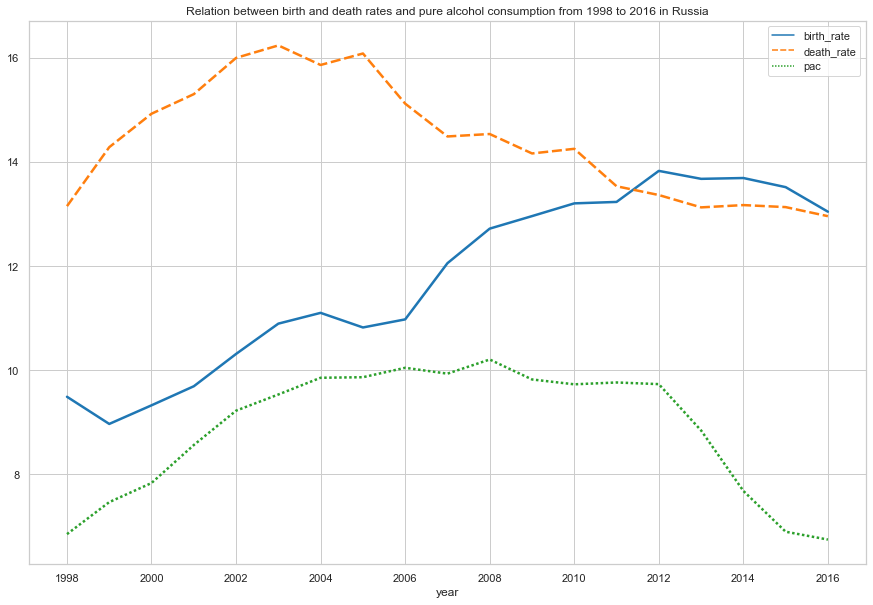

In [5]:
values = alcohol_demography.groupby(['year']).mean()
x_axis = alcohol_demography.drop_duplicates(subset='year')['year']

sns.set_theme(style="whitegrid")

data = pd.DataFrame(values, x_axis, columns=['birth_rate','death_rate', 'pac'])


chart = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
chart.set(title='Relation between birth and death rates and pure alcohol consumption from 1998 to 2016 in Russia')

<h2>Total consumption by drink type</h2>

[Text(0.5, 1.0, 'Total consumption by drink type from 1998 to 2016 in Russia')]

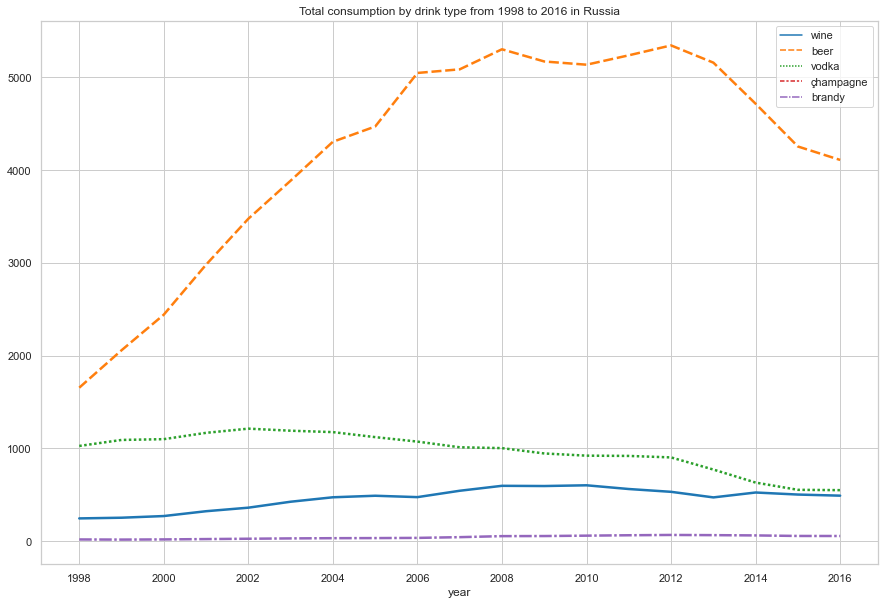

In [6]:
values = alcohol_demography.groupby(['year']).sum()
x_axis = alcohol_demography.drop_duplicates(subset='year')['year']

sns.set_theme(style="whitegrid")

data = pd.DataFrame(values, x_axis, columns=['wine','beer', 'vodka','çhampagne','brandy'])

sns.lineplot(data=data, palette="tab10", linewidth=2.5).set(title='Total consumption by drink type from 1998 to 2016 in Russia')

<h2>Average urbanization percentage</h2>

[Text(0.5, 1.0, 'Average urbanization percentage from 1998 to 2016 in Russia')]

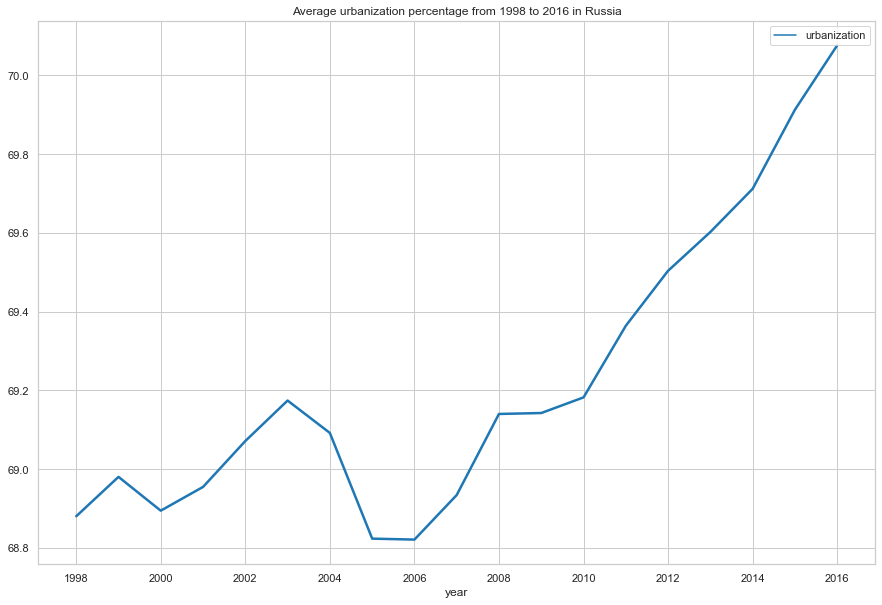

In [7]:
values = alcohol_demography.groupby(['year']).mean()
x_axis = alcohol_demography.drop_duplicates(subset='year')['year']

sns.set_theme(style="whitegrid")

data = pd.DataFrame(values, x_axis, columns=['urbanization'])

sns.lineplot(data=data, palette="tab10", linewidth=2.5).set(title='Average urbanization percentage from 1998 to 2016 in Russia')
